In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import mysql.connector

In [19]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Bi08112002#",
    database="job_db"
)

query = "SELECT * FROM jobs"
df = pd.read_sql(query,  conn)
conn.close()

/var/folders/kb/pc81xsyd1vvfj_gcbjrk7k2m0000gn/T/ipykernel_41156/2933549551.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,  conn)


In [20]:
df.head()

,created_date,position,level,company,min_salary,max_salary,salary_unit,city,district,time_remaining,link
0,2023-08-01,BUSINESS_ANALYST,UNKNOWN,Công ty TNHH Công nghệ số Adamo,10,20,million VND,Hà Nội,,Còn 25 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/business-analyst...
1,2023-08-01,SOFTWARE_ENGINEER,UNKNOWN,Công ty TNHH Đầu Tư Công Nghệ ST,10,20,million VND,Hồ Chí Minh,,Còn 91 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/nhan-vien-lap-tr...
2,2023-08-01,SOFTWARE_ENGINEER,UNKNOWN,Công ty TNHH CMC GLOBAL,negotiate,negotiate,negotiate,Toàn Quốc,,Còn 30 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/net-developer-n3...
3,2023-08-01,PROJECT_MANAGER,MANAGER,CÔNG TY CỔ PHẦN CÔNG NGHỆ SOTATEK,,35,million VND,Hà Nội,Cầu Giấy,Còn 25 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/project-manager-...
4,2023-08-01,DEVOPS_ENGINEER,SENIOR,Công ty Cổ phần Thời Trang Yody,,50,million VND,Hà Nội,Thanh Xuân,Còn 30 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/devops-sre-chuye...


# Vẽ biểu đồ phân bố mức lương theo vị trí

In [21]:
USD_TO_VND = 25000
def normalize_salary(value, unit):
    if pd.isna(value):
        return np.nan

    if unit.lower() == "usd":
        return value * USD_TO_VND / 1_000_000

    if unit.lower() == "million vnd":
        return value

    return np.nan

In [22]:
df["min_salary"] = pd.to_numeric(df["min_salary"], errors="coerce")
df["max_salary"] = pd.to_numeric(df["max_salary"], errors="coerce")

df["min_salary_mil_vnd"] = df.apply(
    lambda r: normalize_salary(r["min_salary"], r["salary_unit"]),
    axis=1
)

df["max_salary_mil_vnd"] = df.apply(
    lambda r: normalize_salary(r["max_salary"], r["salary_unit"]),
    axis=1
)
df["avg_salary_mil_vnd"] = df[
    ["min_salary_mil_vnd", "max_salary_mil_vnd"]
].mean(axis=1)

df_salary = df.dropna(subset=["avg_salary_mil_vnd", "position"])

In [23]:
df_salary.head()

,created_date,position,level,company,min_salary,max_salary,salary_unit,city,district,time_remaining,link,min_salary_mil_vnd,max_salary_mil_vnd,avg_salary_mil_vnd
0,2023-08-01,BUSINESS_ANALYST,UNKNOWN,Công ty TNHH Công nghệ số Adamo,10.0,20.0,million VND,Hà Nội,,Còn 25 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/business-analyst...,10.0,20.0,15.0
1,2023-08-01,SOFTWARE_ENGINEER,UNKNOWN,Công ty TNHH Đầu Tư Công Nghệ ST,10.0,20.0,million VND,Hồ Chí Minh,,Còn 91 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/nhan-vien-lap-tr...,10.0,20.0,15.0
3,2023-08-01,PROJECT_MANAGER,MANAGER,CÔNG TY CỔ PHẦN CÔNG NGHỆ SOTATEK,NaN,35.0,million VND,Hà Nội,Cầu Giấy,Còn 25 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/project-manager-...,NaN,35.0,35.0
4,2023-08-01,DEVOPS_ENGINEER,SENIOR,Công ty Cổ phần Thời Trang Yody,NaN,50.0,million VND,Hà Nội,Thanh Xuân,Còn 30 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/devops-sre-chuye...,NaN,50.0,50.0
5,2023-08-01,SOFTWARE_ENGINEER,SENIOR,Công ty Cổ Phần Rikkeisoft,12.0,18.0,million VND,Hà Nội,Nam Từ Liêm,Còn 30 ngà y để ứng tuyển,https://www.topcv.vn/viec-lam/angularjs-tu-1-5...,12.0,18.0,15.0


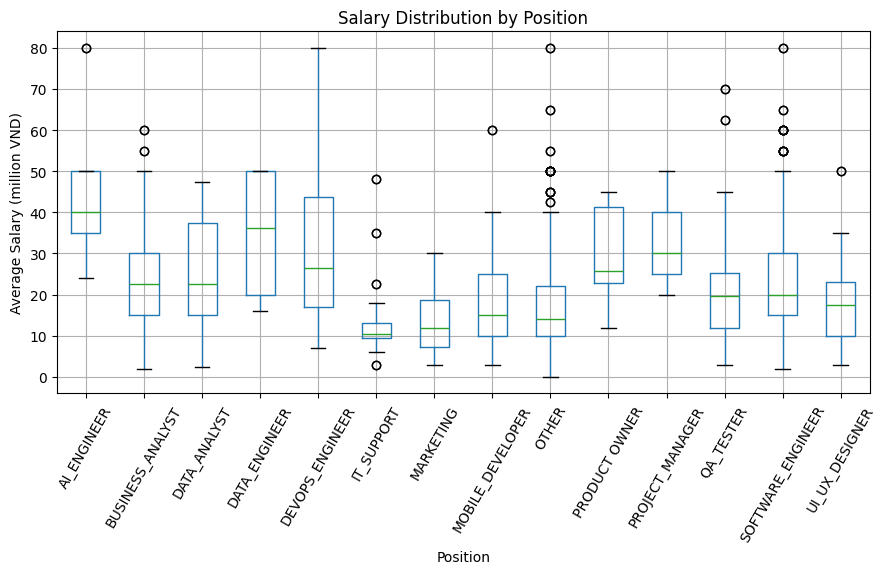

In [24]:
df.boxplot(
    column="avg_salary_mil_vnd",
    by="position",
    figsize=(9, 6),
    rot=60
)

plt.title("Salary Distribution by Position")
plt.suptitle("")
plt.xlabel("Position")
plt.ylabel("Average Salary (million VND)")
plt.tight_layout()
plt.show()


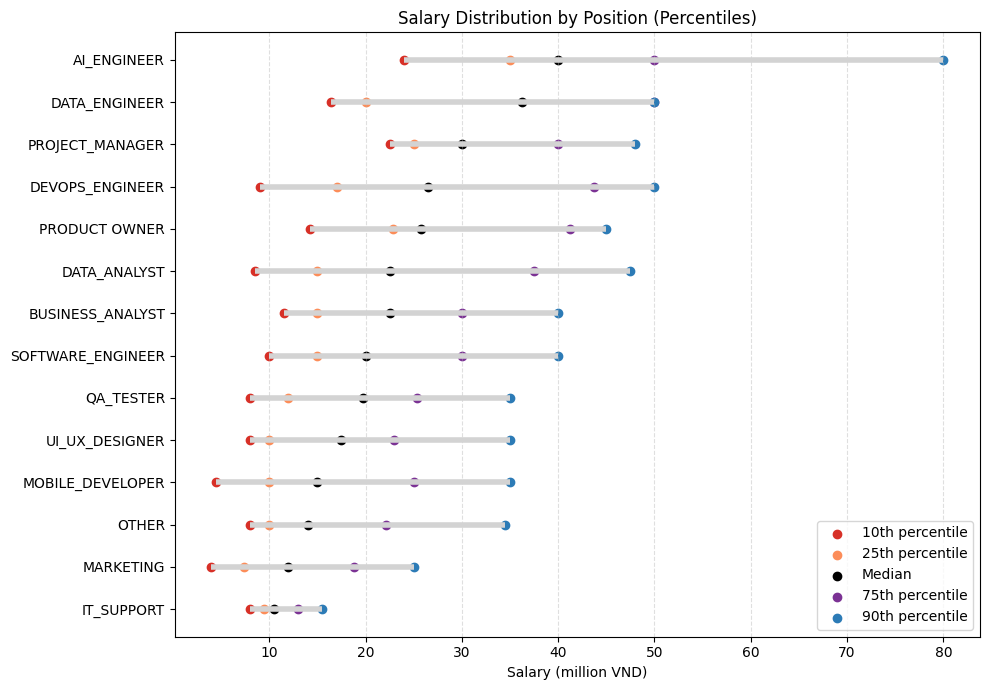

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate percentiles by position
stats = (
    df.groupby("position")["avg_salary_mil_vnd"]
      .quantile([0.1, 0.25, 0.5, 0.75, 0.9])
      .unstack()
      .reset_index()
)

stats.columns = ["position", "p10", "p25", "median", "p75", "p90"]

# Sort by median salary
stats = stats.sort_values("median")

# Plot
fig, ax = plt.subplots(figsize=(10, 7))

y_pos = np.arange(len(stats))

# Draw range line (10th to 90th)
ax.hlines(
    y=y_pos,
    xmin=stats["p10"],
    xmax=stats["p90"],
    color="lightgray",
    linewidth=4
)

# Plot dots
ax.scatter(stats["p10"], y_pos, color="#d73027", label="10th percentile")
ax.scatter(stats["p25"], y_pos, color="#fc8d59", label="25th percentile")
ax.scatter(stats["median"], y_pos, color="black", label="Median")
ax.scatter(stats["p75"], y_pos, color="#7b3294", label="75th percentile")
ax.scatter(stats["p90"], y_pos, color="#2c7bb6", label="90th percentile")

# Labels
ax.set_yticks(y_pos)
ax.set_yticklabels(stats["position"])
ax.set_xlabel("Salary (million VND)")
ax.set_title("Salary Distribution by Position (Percentiles)")

# Grid & style
ax.grid(axis="x", linestyle="dashed", alpha=0.4)
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


# Vẽ bản đồ heatmap phân bố việc làm theo khu vực

In [25]:
import geopandas as gpd
import geodatasets

vn_provinces = gpd.read_file("../data/geo/vn_provinces.geojson")

In [26]:
vn_provinces.head()

,OBJECTID,f_code,Ten_Tinh,Ten_Huyen,Dan_So,Nam_TK,Code_vung,geometry
0,1,AD02,Cà Mau,Nam Căn,66229,2009,96971,"POLYGON ((105.05492 8.85322, 105.05819 8.85155..."
1,2,AD02,Cà Mau,Dam Doi,182028,2009,96970,"POLYGON ((105.16041 9.09551, 105.16228 9.09309..."
2,3,AD02,Cà Mau,Cái Nước,137396,2009,96969,"POLYGON ((105.08692 9.13987, 105.08773 9.13954..."
3,4,AD02,Bạc Liêu,Đông Hải,143590,2009,95960,"POLYGON ((105.55273 9.23437, 105.56841 9.17901..."
4,5,AD02,Cà Mau,TP. Cà Mau,216196,2009,96964,"POLYGON ((105.1723 9.26629, 105.17518 9.26575,..."


In [27]:
job_by_city = (
    df["city"]
    .value_counts()
    .reset_index()
)

job_by_city.columns = ["city", "job_count"]
job_by_city.city.unique()

array(['Hà Nội', 'Hồ Chí Minh', 'Đà Nẵng', 'Bình Dương', 'Nước Ngoài',
       'Cần Thơ', 'Toàn Quốc', 'Thừa Thiên Huế', 'Nghệ An', 'Hải Phòng',
       'Đồng Tháp', 'Bắc Ninh', 'Đồng Nai', 'Long An', 'Hà Nam',
       'Lâm Đồng', 'Tiền Giang', 'Hưng Yên', 'Bình Định', 'Tây Ninh',
       'Hà Tĩnh', 'Bắc Giang', 'Thái Bình', 'Gia Lai', 'An Giang',
       'Bến Tre'], dtype=object)

In [28]:
CITY_NAME_MAPPING = {
    "Hà Nội": "Hà Nội",
    "Hồ Chí Minh": "TP. Hồ Chí Minh",
    "Đà Nẵng": "Đà Nẵng",
    "Bình Dương": "Bình Dương",
    "Cần Thơ": "Cần Thơ",
    "Thừa Thiên Huế": "Thừa Thiên Huế",
    "Nghệ An": "Nghệ An",
    "Hải Phòng": "Hải Phòng",
    "Đồng Tháp": "Đồng Tháp",
    "Bắc Ninh": "Bắc Ninh",
    "Đồng Nai": "Đồng Nai",
    "Long An": "Long An",
    "Hà Nam": "Hà Nam",
    "Lâm Đồng": "Lâm Đồng",
    "Tiền Giang": "Tiền Giang",
    "Hưng Yên": "Hưng Yên",
    "Bình Định": "Bình Định",
    "Tây Ninh": "Tây Ninh",
    "Hà Tĩnh": "Hà Tĩnh",
    "Bắc Giang": "Bắc Giang",
    "Thái Bình": "Thái Bình",
    "Gia Lai": "Gia Lai",
    "An Giang": "An Giang",
    "Bến Tre": "Bến Tre"
}
job_by_city["city_geo"] = job_by_city["city"].map(CITY_NAME_MAPPING)

In [29]:
vn_provinces = vn_provinces.merge(
    job_by_city,
    left_on="Ten_Tinh",      # check actual province name field
    right_on="city_geo",
    how="left"
)
vn_provinces["job_count"] = vn_provinces["job_count"].fillna(0)

<Axes: >

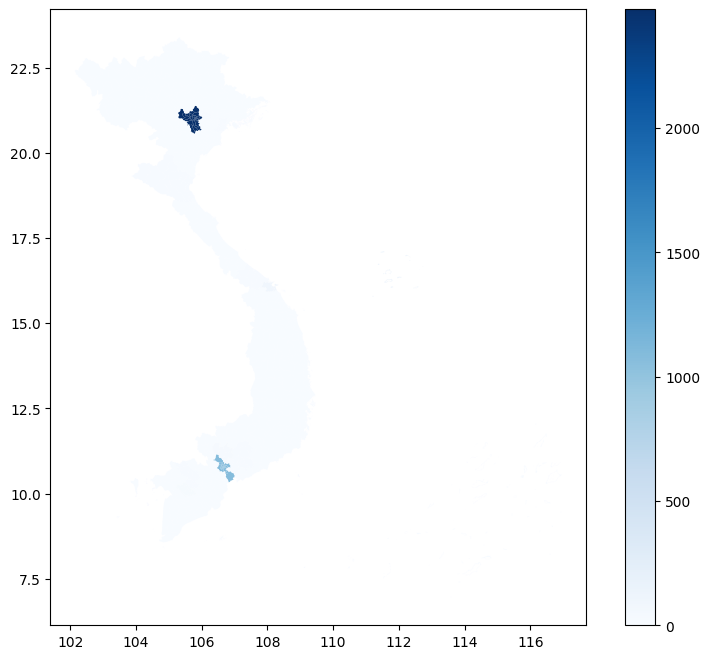

In [30]:
vn_provinces.plot(
    column="job_count",
    cmap="Blues",
    legend=True,
    figsize=(10, 8),
    edgecolor=None
)

# Biểu đồ xu hướng công nghệ hot

In [31]:
df.created_date.unique()

array([datetime.date(2023, 8, 1)], dtype=object)

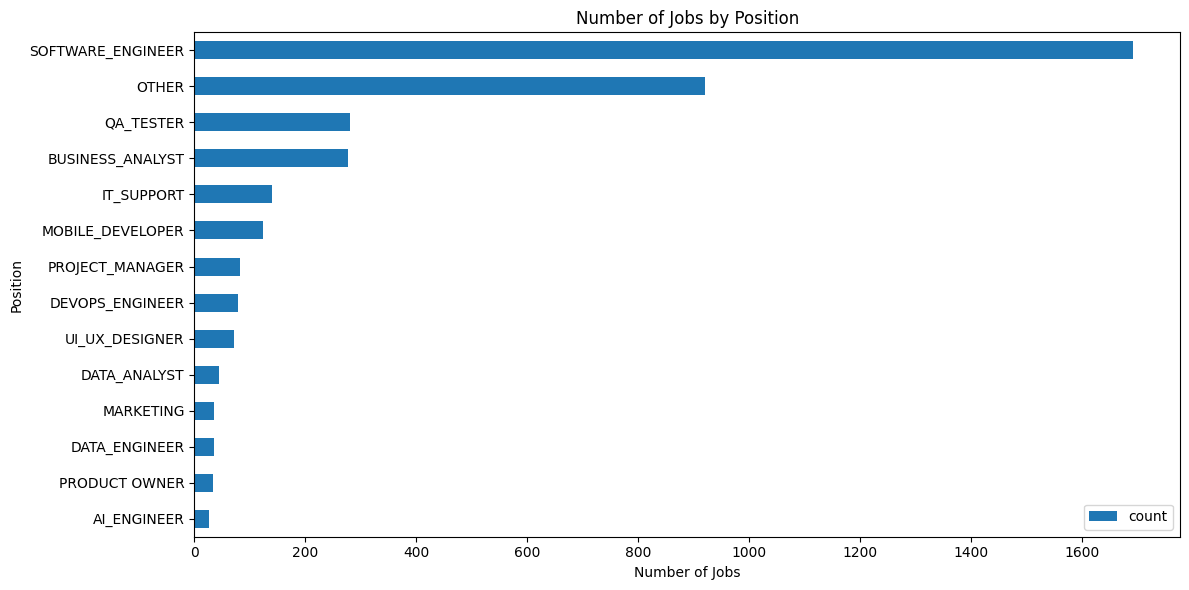

In [32]:
job_by_position = df["position"].value_counts().reset_index().sort_values(by="count")
job_by_position.plot(kind="barh", x="position", figsize=(12,6))
plt.title("Number of Jobs by Position")
plt.xlabel("Number of Jobs")
plt.ylabel("Position")
plt.tight_layout()
plt.show()